In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [13]:
planets = sns.load_dataset("planets")
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [ ]:
# veri setinin hikayesi nedir? Bu veri seti galaksilerin bulunma şekli ile ilgili bir veri setidir.

In [77]:
df = planets.copy()
# orjinl veri setini df dataframeye kopyaladık.
df.tail()
# tail son 5 satırı inceler.

,method,number,orbital_period,mass,distance,year
1030,Transit,1,3.941507,NaN,172.0,2006
1031,Transit,1,2.615864,NaN,148.0,2007
1032,Transit,1,3.191524,NaN,174.0,2007
1033,Transit,1,4.125083,NaN,293.0,2008
1034,Transit,1,4.187757,NaN,260.0,2008


In [15]:
# veri setinin sutunları ile ilgili bilgileri almak için 
df.info()
# her sutunun veri türleri ve null olmayan değerlerini gösterir.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [16]:
# sadece sutunların veri tiplerini göstermek istersek : 
df.dtypes

method             object
number              int64
orbital_period    float64
mass              float64
distance          float64
year                int64
dtype: object

In [17]:
print(df["method"].dtypes)
# method object türde istersek bunu categorical veri tipine çevirebiliriz.
df["method"] = pd.Categorical(df["method"])
print(df["method"].dtypes)

object
category


In [18]:
# satır ve sutun sayısı için : 
df.shape

(1035, 6)

In [19]:
# sadece sutun adları : 
df.columns

Index(['method', 'number', 'orbital_period', 'mass', 'distance', 'year'], dtype='object')

In [20]:
# df içinde ki değişkenlerin istatiksel hesaplamaları : 
df.describe()
# df içinde ki sayısal değişkenler vardır.

,number,orbital_period,mass,distance,year
count,1035.000000,992.000000,513.000000,808.000000,1035.000000
mean,1.785507,2002.917596,2.638161,264.069282,2009.070531
std,1.240976,26014.728304,3.818617,733.116493,3.972567
min,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,1.000000,5.442540,0.229000,32.560000,2007.000000
50%,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,2.000000,526.005000,3.040000,178.500000,2012.000000
max,7.000000,730000.000000,25.000000,8500.000000,2014.000000


In [23]:
df[["method"]].describe().T
# categoric değişken için de describe fonksiyonu kullanılabilir. T transpozu al demek.

,count,unique,top,freq
method,1035,10,Radial Velocity,553


In [26]:
# hem categoric hem de sayısal değişkenlerin describe nı beraber almak istersek 
df.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
method,1035,10,Radial Velocity,553,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number,1035,NaN,NaN,NaN,1.78551,1.24098,1,1,1,2,7
orbital_period,992,NaN,NaN,NaN,2002.92,26014.7,0.0907063,5.44254,39.9795,526.005,730000
mass,513,NaN,NaN,NaN,2.63816,3.81862,0.0036,0.229,1.26,3.04,25
distance,808,NaN,NaN,NaN,264.069,733.116,1.35,32.56,55.25,178.5,8500
year,1035,NaN,NaN,NaN,2009.07,3.97257,1989,2007,2010,2012,2014


In [27]:
df.isnull().sum()
# veri setinde ki eksik olan değerleri görmek istersek.

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

In [29]:
df[["orbital_period","mass","distance"]].describe().T
# burda görüldüğü üzere orbital_period ve distance ta ortalama değer ile medyan değeri arasında ki fark çok fazladır.
# onun için orbital_period ve distance taki null değerleri medyan değerleri ile, mass ise ortalama ile dolduracağım.
# çünkü max ve min değerler arasın daki fark çok fazla olursa nan değerleri ortalama ile doldurusak veri setinde fazla
# bozulma olabilir.

,count,mean,std,min,25%,50%,75%,max
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0


In [75]:
for i in df.columns[:]:
    if df[i].dtype == float or df[i].dtype == int :
        if df[i].max() - df[i].min() <= 100:
            df[i].fillna(df[i].mean(), inplace=True)
        elif df[i].max() - df[i].min() > 100:
            df[i].fillna(df[i].median(), inplace=True)
    elif df[i].dtype == object :
        df[i].fillna(method="ffill",inplace=True)    
# burda oluşturduğumuz for döngüsü ile sayısal değişkenler için bir koşul belirleyip ona göre doldurdum.        

In [76]:
df.isnull().sum()

method            0
number            0
orbital_period    0
mass              0
distance          0
year              0
dtype: int64

In [78]:
# 2. yol dropna : 
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

In [81]:
df = planets.copy()

In [79]:
df.dropna(inplace=True)

In [80]:
df.isnull().sum()

method            0
number            0
orbital_period    0
mass              0
distance          0
year              0
dtype: int64

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [83]:
# sadece categoric değişkenleri seçmek : 
cat_df = df.select_dtypes(include=["object"])
cat_df

,method
0,Radial Velocity
1,Radial Velocity
2,Radial Velocity
3,Radial Velocity
4,Radial Velocity
...,...
1030,Transit
1031,Transit
1032,Transit
1033,Transit


In [85]:
cat_df.method.unique()
# cat_df içinde ki tüm sınıflara eriştik

array(['Radial Velocity', 'Imaging', 'Eclipse Timing Variations',
       'Transit', 'Astrometry', 'Transit Timing Variations',
       'Orbital Brightness Modulation', 'Microlensing', 'Pulsar Timing',
       'Pulsation Timing Variations'], dtype=object)

In [86]:
cat_df["method"].value_counts()
# hangi sınıftan kaç tane var

Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: method, dtype: int64

In [88]:
# toplam kaç sınıf var 
cat_df["method"].value_counts().count()
# 10 tane sınıf var.

10

In [89]:
# sayısal değişkenleri seçme : 
df_sayısal = df.select_dtypes(include = ["float64","int64"])
df_sayısal

,number,orbital_period,mass,distance,year
0,1,269.300000,7.10,77.40,2006
1,1,874.774000,2.21,56.95,2008
2,1,763.000000,2.60,19.84,2011
3,1,326.030000,19.40,110.62,2007
4,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...
1030,1,3.941507,NaN,172.00,2006
1031,1,2.615864,NaN,148.00,2007
1032,1,3.191524,NaN,174.00,2007
1033,1,4.125083,NaN,293.00,2008


In [90]:
df_sayısal.describe().T

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.000000,1.00000,1.0000,2.000,7.0
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0
year,1035.0,2009.070531,3.972567,1989.000000,2007.00000,2010.0000,2012.000,2014.0


In [91]:
df_sayısal["mass"].describe().T

count    513.000000
mean       2.638161
std        3.818617
min        0.003600
25%        0.229000
50%        1.260000
75%        3.040000
max       25.000000
Name: mass, dtype: float64

Categoric Değişkene çevirme ve o değişkeni ordered olarak sıralama:

In [92]:
diamonds = sns.load_dataset("diamonds")
df = diamonds.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [95]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [96]:
df["cut"].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [97]:
df["clarity"].value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

In [98]:
# ordinal tanımlama :
from pandas.api.types import CategoricalDtype

In [101]:
df.cut = df["cut"].astype(CategoricalDtype(ordered=True))
# cut yani kalite sutununu categoric değişkene çevir ve ordinal olarak tanımla demek.
# ordinal sıralama demektir. kalite durumlarına göre sırala dedik.

In [102]:
df.cut.head(1)
# fakat görüldüğü gibi doğru sıralayamadı. o zaman bizim ifade etmemiz lazım.
# biz kalite durumuna göre sıralam istiyoruz.
# Fair,Good,Very Good,Premium,ıdeal şeklinde olacak.

0    Ideal
Name: cut, dtype: category
Categories (5, object): ['Ideal' < 'Premium' < 'Very Good' < 'Good' < 'Fair']

In [107]:
cut_ordinal = ["Fair","Good","Very Good","Premium","Ideal"]

In [108]:
df["cut"] = df["cut"].astype(CategoricalDtype(categories=cut_ordinal, ordered=True))

In [109]:
df["cut"].head(1)
# böylece istediğimiz gibi sıraladık.

0    Ideal
Name: cut, dtype: category
Categories (5, object): ['Fair' < 'Good' < 'Very Good' < 'Premium' < 'Ideal']

## DAĞILIM GRAFİKLERİ : 

### 1-) Barplot : 

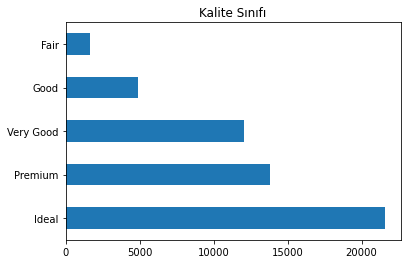

In [110]:
df["cut"].value_counts().plot.barh().set_title("Kalite Sınıfı");
# bu pandas ile yapılan bir görselleştirme : 

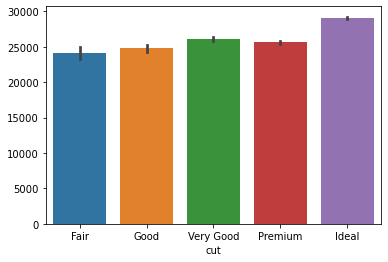

In [111]:
sns.barplot(x="cut", y=df.cut.index, data =df);
# seaborn ile oluşturmak.

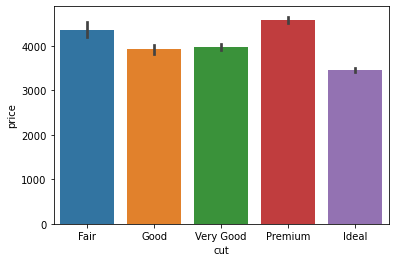

In [114]:
# barplot ile kalite durumlarına göre price değerlerine bakalım.
sns.barplot(x="cut", y="price", data=df);

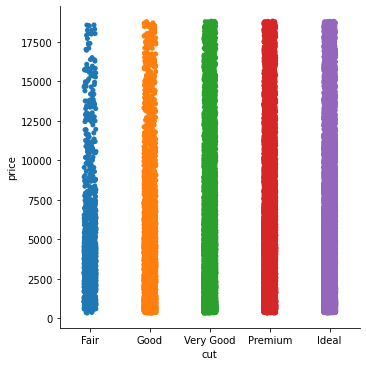

In [115]:
# birde yoğunluk durumlarına bakalım.
sns.catplot(x="cut",y="price",data=df);
# fiyatlar arttıkça en yoğun ideal var.

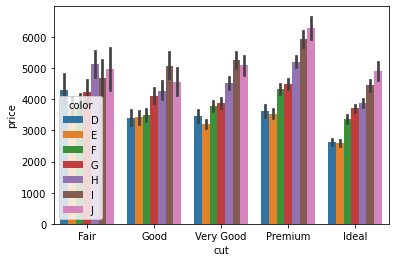

In [119]:
# barplota bir değişken daha ekleyelim.
sns.barplot(x="cut",y="price",hue="color", data=df);
# yukarıda sadece cut ve price ile grafiğe baktık ve çok farklı bir grafik olmuştu. 
# renk değişkenini yeni bir boyut olarak eklediğimiz zaman bize farklı bir fiyatlama grafiği verdi.

In [130]:
df.groupby(["cut","color"])["price"].mean()
# yukarıda ki grafiğin yaptığını groupby ile yaptık.

cut        color
Fair       D        4291.061350
           E        3682.312500
           F        3827.003205
           G        4239.254777
           H        5135.683168
           I        4685.445714
           J        4975.655462
Good       D        3405.382175
           E        3423.644159
           F        3495.750275
           G        4123.482204
           H        4276.254986
           I        5078.532567
           J        4574.172638
Very Good  D        3470.467284
           E        3214.652083
           F        3778.820240
           G        3872.753806
           H        4535.390351
           I        5255.879568
           J        5103.513274
Premium    D        3631.292576
           E        3538.914420
           F        4324.890176
           G        4500.742134
           H        5216.706780
           I        5946.180672
           J        6294.591584
Ideal      D        2629.094566
           E        2597.550090
           F        337

### 2-) Histogram ve Yoğunluk Grafiği :

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


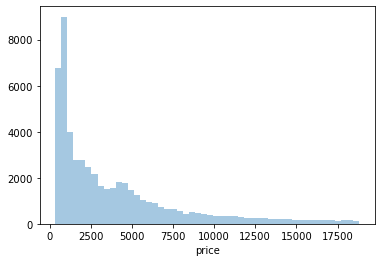

In [131]:
sns.distplot(df["price"], kde=False);
# elimizdeki sayısal değişkenin dağılımını vermektedir.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


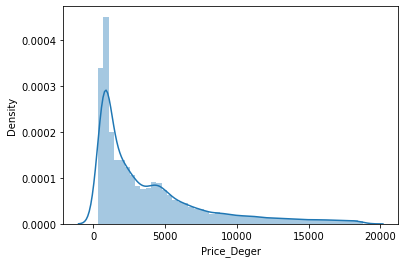

In [139]:
sns.distplot(df["price"], kde=True, axlabel="Price_Deger" );

In [140]:
import scipy.stats as sts

In [141]:
sts.kurtosis(df["price"])
# 

2.177382669056634

In [142]:
sts.describe(df["price"]).skewness

1.6183502776053016

In [ ]:
# pozitif çarpıktır. biraz yayvandır. 

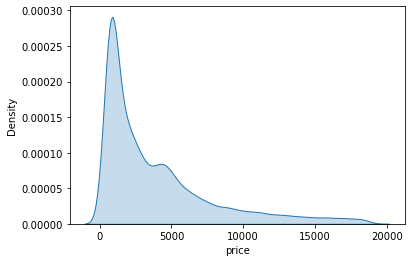

In [143]:
sns.kdeplot(df.price, shade=True);
# basıklık kurtosis ve çarpıklık durumlarını grafik olarak bize verir.

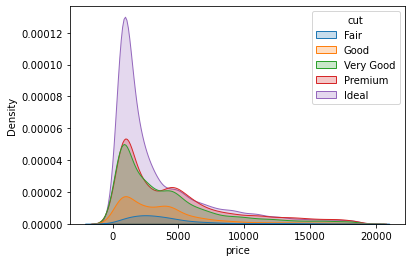

In [146]:
sns.kdeplot(df.price, hue = df["cut"] , shade=True);
# bu grafikte Ideal sınıfın 0-3000 arasında diğerlerine göre epey bir yer kapladığı görülmektedir.

### 3-) Boxplot Grafiği :

In [147]:
# genelde outlier tespitinde kullanışlı bir grafiktir.

In [12]:
tips = sns.load_dataset("tips")
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [14]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [16]:
df.select_dtypes(include= ["category"]).describe()

,sex,smoker,day,time
count,244,244,244,244
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


In [17]:
df.sex.value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [18]:
df["day"].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

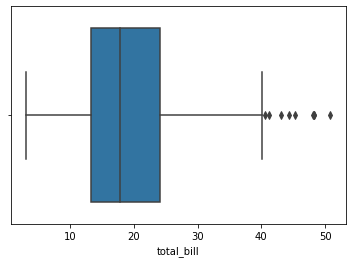

In [19]:
sns.boxplot(x = "total_bill", data=df);
# aynı zamanda aykırı değişkenleride gördük.

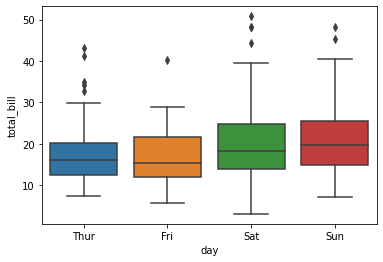

In [26]:
# çaprazlama :
sns.boxplot(x = "day", y = "total_bill", data=df);
# hangi günler daha fazla kazanmaktayız.

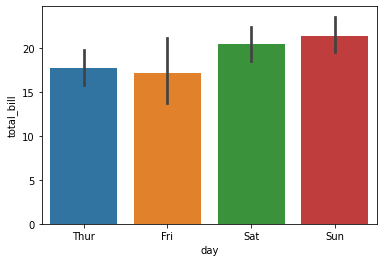

In [25]:
# barplot ile de yapabiliriz. 
sns.barplot(y="total_bill", x="day", data=df);

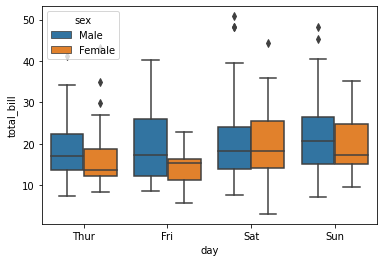

In [27]:
# hangi daha fazla kazanıyoruz ve hangi cinsiyetten daha çok kazanıyoruz.
sns.boxplot(x="day", y="total_bill",hue="sex",data=df);

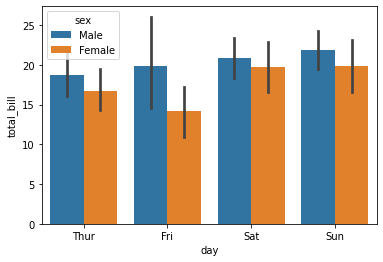

In [28]:
# barplot ile de bakabiliriz.
sns.barplot(x="day", y="total_bill", hue="sex", data=df);

In [33]:
# kod ile hangi gün hangi cinsiyet daha çok para kazanıyor 
df.groupby(["sex","day"])["total_bill"].sum().unstack()

day,Thur,Fri,Sat,Sun
sex,,,,
Male,561.44,198.57,1227.35,1269.46
Female,534.89,127.31,551.05,357.70


In [37]:
# en çok akşam mı gündüz mü kazanıyoruz. kod ile :
df.groupby("time")["total_bill"].sum()

time
Lunch     1167.47
Dinner    3660.30
Name: total_bill, dtype: float64

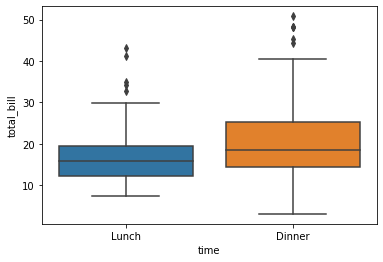

In [38]:
# bir de grafikle bakalım.
sns.boxplot(x="time", y = "total_bill", data=df);

In [45]:
# yemeğe gelen kişi sayısı ve kazanç arasında ki ilişki kod ile
df["total_bill"].corr(df["size"])
# arasın da pozitif yönlü orta şiddette bir ilişki var.

0.5983151309049012

In [51]:
# kod ile rakamsal gösterelim.
round(df.groupby("size")[["total_bill"]].sum())

,total_bill
size,
1,29.0
2,2566.0
3,885.0
4,1059.0
5,150.0
6,139.0


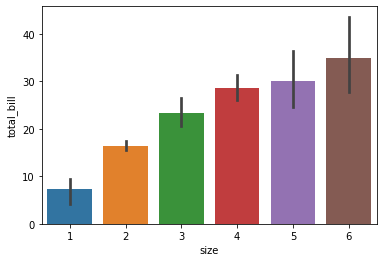

In [52]:
# bunu barplot ile gçsterelim : 
sns.barplot(x="size", y="total_bill", data=df);

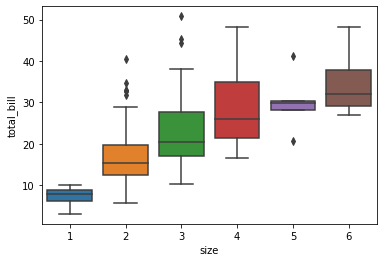

In [53]:
# boxplot ile : 
sns.boxplot(x="size", y="total_bill", data=df);

### Violin Grafiği : 

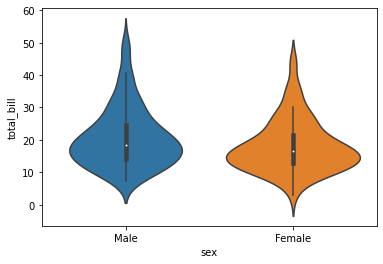

In [55]:
sns.violinplot(x="sex", y="total_bill", data=df);
# bu grafik bize merkezlerde ki konumlamları sunar. boxplotta yakın bir grafiktir.

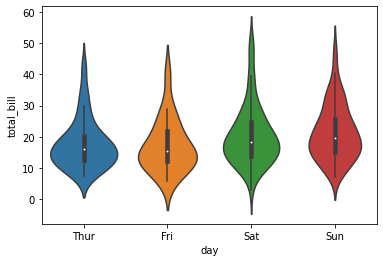

In [59]:
sns.violinplot(x="day", y="total_bill", data=df);
# günlere göre hesap ödeme

### Korelasyon Grafiği : 

In [60]:
# Değişkenler arasında ki ilişkiyi inceler. En çok scatterplot kullanılır.

#### Scatterplot :

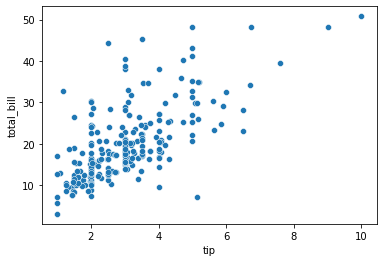

In [61]:
# bahşiş ile hesap arasında ki ilişkiye bakalım.
sns.scatterplot(x="tip", y="total_bill", data=df);
# ödenen hesap ve bahşiş arasında pozitif bir ilişki vardır.

In [62]:
df["total_bill"].corr(df["tip"])

0.6757341092113646

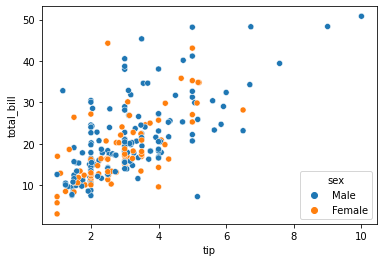

In [63]:
sns.scatterplot(x="tip", y="total_bill", hue="sex", data=df);
# mavi renk erkekler. erkekler daha fazla bahşiş vermiş ve daha çok bahşiş ödemiş.

In [67]:
# kod ile yapalım hem de gelen erkek ve kadın sayısına göre hesap ve bahşiş miktarına bakalım.
df.groupby("sex")["size","total_bill","tip"].sum()

<ipython-input-67-4275cf8bc589>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby("sex")["size","total_bill","tip"].sum()


,size,total_bill,tip
sex,,,
Male,413,3256.82,485.07
Female,214,1570.95,246.51


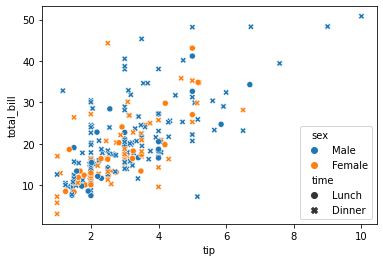

In [68]:
sns.scatterplot(x="tip", y="total_bill", hue="sex", style="time", data=df);
# en fazla harcamanın akşam yemeğinde erkekler tarafından yapıldığı görülür.

In [70]:
df.groupby(["sex","time"])["tip","total_bill"].sum()

<ipython-input-70-a21a87f3fbd6>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(["sex","time"])["tip","total_bill"].sum()


tip  total_bill
sex    time                      
Male   Lunch    95.11      595.60
       Dinner  389.96     2661.22
Female Lunch    90.40      571.87
       Dinner  156.11      999.08

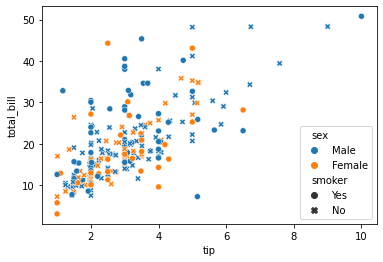

In [71]:
# sigara içenlere göre bakalım.
sns.scatterplot(x="tip", y="total_bill", hue="sex", style="smoker", data=df);
# erkeklerde sigara içenler daha fazla öderken kadınlarda farklı bir durum oluşmuş

In [72]:
# kod ile yapalım.
df.groupby(["sex","smoker"])["tip","total_bill"].sum()

<ipython-input-72-7df8563eb587>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(["sex","smoker"])["tip","total_bill"].sum()


tip  total_bill
sex    smoker                    
Male   Yes     183.07     1337.07
       No      302.00     1919.75
Female Yes      96.74      593.27
       No      149.77      977.68

#### Doğrusal ilişki ile gösterme  :

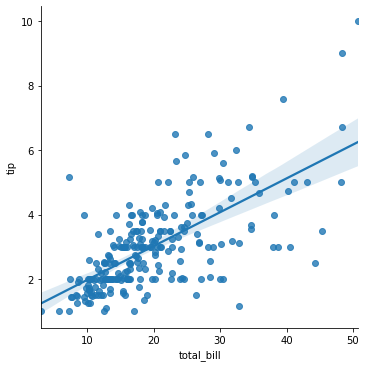

In [75]:
sns.lmplot(x="total_bill", y="tip", data=df);

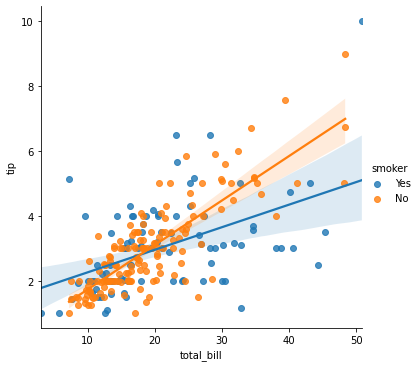

In [76]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=df);
# sigara içmeyenlerde ödenen hesap arttıkça verilen bahşiş miktarı daha keskin bir şekilde artmıştır.

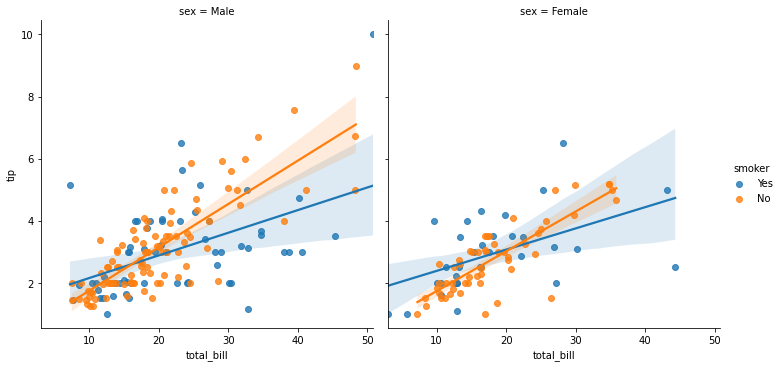

In [77]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", col="sex", data=df);
# bize cinsiyet sutununa göre iki farklı grafik getirdi. col dediğimiz için yanyana getirdi.

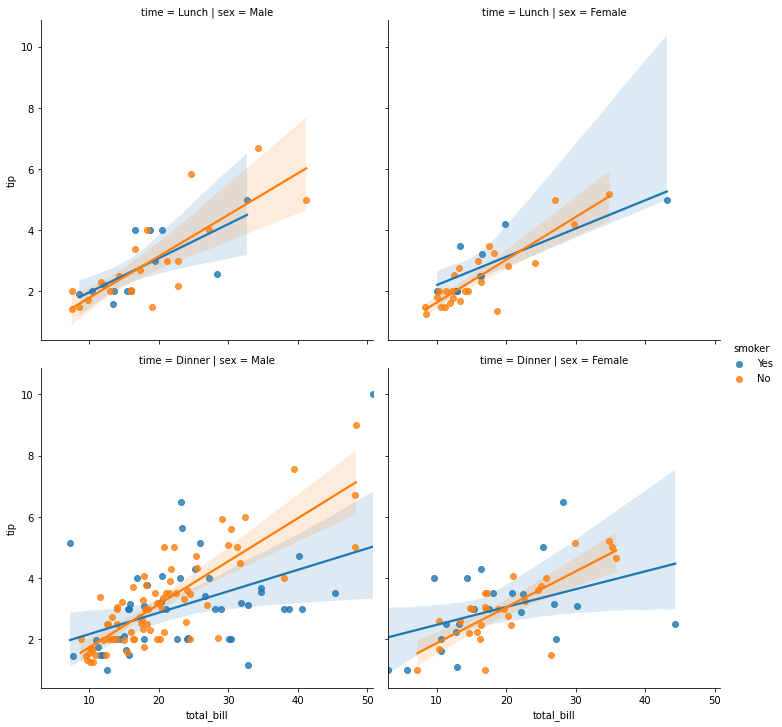

In [78]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", col="sex", row="time", data=df);
# üst satırda ki iki grafik lunch harcama yapan erkek ve kadınların ödeme miktarı ve bahşiş,
# alt iki satırda dinner harcama yapan erkek ve kadınların ödeme miktarı ve bahşiş,

In [79]:
# kod ile yapalım.
df.groupby(["sex","time","smoker"])["tip","total_bill"].sum()

<ipython-input-79-e0b82d504666>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(["sex","time","smoker"])["tip","total_bill"].sum()


tip  total_bill
sex    time   smoker                    
Male   Lunch  Yes      36.28      225.87
              No       58.83      369.73
       Dinner Yes     146.79     1111.20
              No      243.17     1550.02
Female Lunch  Yes      28.91      174.31
              No       61.49      397.56
       Dinner Yes      67.83      418.96
              No       88.28      580.12

#### Scatterplot Matrisi : 

In [80]:
iris = sns.load_dataset("iris")
df = iris.copy()
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [81]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [83]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [84]:
df.shape

(150, 5)

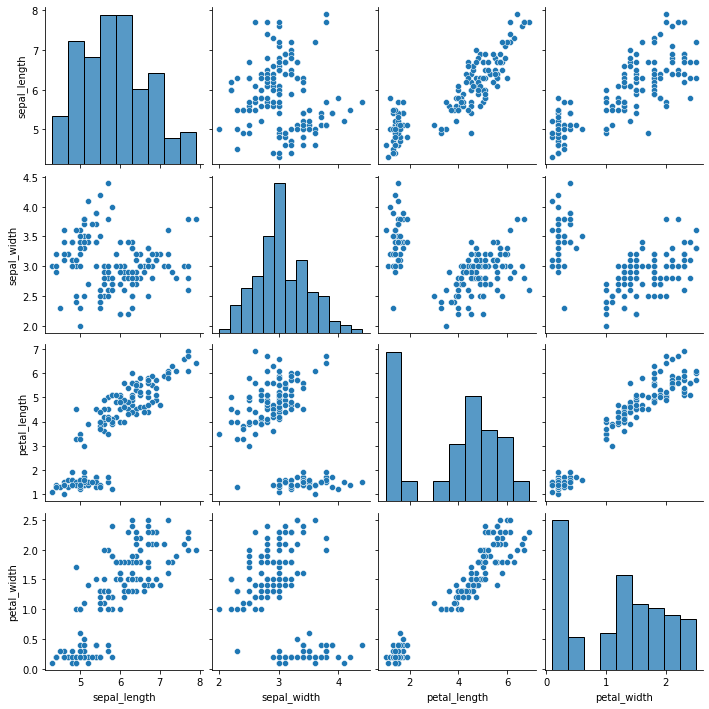

In [85]:
sns.pairplot(df);
# pairplot ile df içinde ki tüm sayısal verilerin histogram ve scatter plot grafiklerini verir.

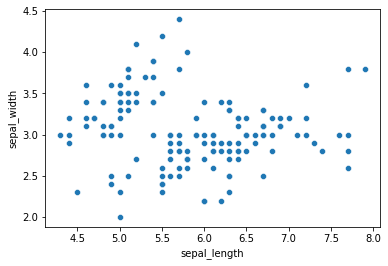

In [87]:
sns.scatterplot(x = "sepal_length", y="sepal_width", data=df);
# burda genişlik ile uzunluk arasında ki ilişkiye baktık.

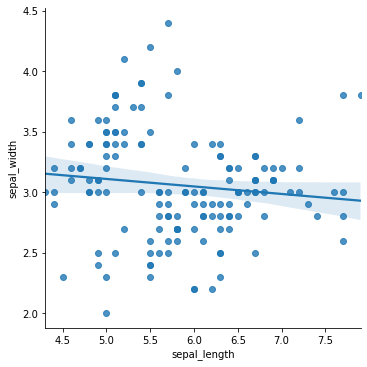

In [88]:
sns.lmplot(x = "sepal_length", y="sepal_width", data=df);
# aralarında ki ilişkiye doğrusal bir çizgi ile görmek istersek.

In [89]:
df["sepal_length"].corr(df["sepal_width"])
# aralarında zayıf negatif yönlü bir ilişki var.

-0.11756978413300201

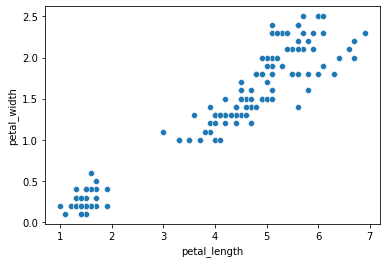

In [92]:
sns.scatterplot(x="petal_length", y="petal_width", data=df);

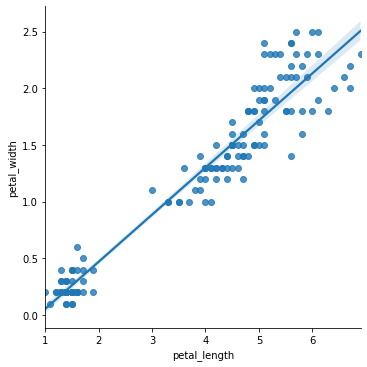

In [93]:
sns.lmplot(x="petal_length", y="petal_width", data=df);
# çok güçlü bir ilişki var

In [94]:
df["petal_length"].corr(df["petal_width"])

0.9628654314027962

### Heatmap : 

In [116]:
flights = sns.load_dataset("flights")
df = flights.copy()
df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [97]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,144.0,1954.500000,3.464102,1949.0,1951.75,1954.5,1957.25,1960.0
passengers,144.0,280.298611,119.966317,104.0,180.00,265.5,360.50,622.0


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


In [100]:
df.isnull().sum()

year          0
month         0
passengers    0
dtype: int64

In [112]:
df = df.pivot("month","year","passengers")
# pivot formatına çevirdik

In [113]:
df.head()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


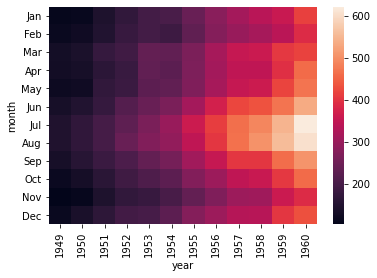

In [114]:
sns.heatmap(df);
# yıllar içinde en fazla uçuş Haziran, temmuz ve ağustos aylarında olmuş

In [128]:
# kod ile yapalım.
df.groupby(["month"])[["passengers"]].max()
# en fazla Yaz aylarında uçuş yapılmış

,passengers
month,
Jan,417
Feb,391
Mar,419
Apr,461
May,472
Jun,535
Jul,622
Aug,606
Sep,508


### Lineplot :

In [129]:
df = sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


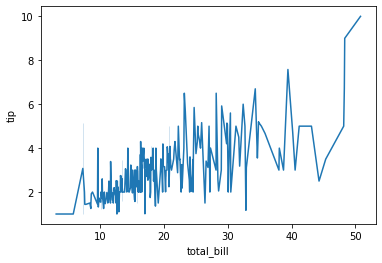

In [130]:
sns.lineplot(x="total_bill", y="tip", data=df);
# çizgiler bazı noktalarda yükselmiş bazı noktalarda düşmüş. ama genel olarak hesap arttmış 50 dolar civarına kadar gelmiş ve
# bahşiş 10 dolar seviyesine kadar çıkmış

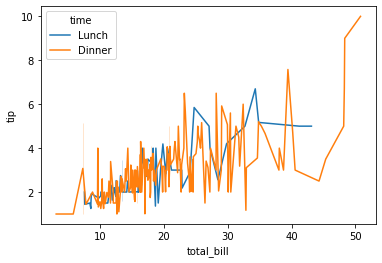

In [132]:
sns.lineplot(x="total_bill", y="tip", hue="time", data=df);
# time olarak dinner da yani akşam yemeklerinde ödenen hesap ve bahşiş miktarı artmış.